# Pattern recognition using SLNNs
## Examples and more

We can import all functions and classes from ```main```. This notebook needs to be in the same directory as the python file.

In [1]:
from main import *

#### Add noise

We have the vector ```nums``` available to us. We can use ```num_show``` to show any number (or any similar matrix, like the weights).

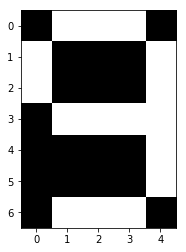

In [2]:
num_show(nums[9])

Adding noise is trivial with the ```add_noise``` function. We just have to specify the percentage of noise to add.

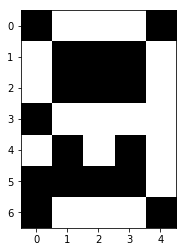

In [3]:
noisy = add_noise(nums[9], 0.05)
num_show(noisy)

#### Generate data

The ```gen_data``` function generates at the same time the train and test sets, with their corresponding labels. The arguments are the seed, the number of elements in the train set, the target numbers, the training and the noise percentage.

In [4]:
train, test, ytr, yte = gen_data(123, 10, [1,2,3], 0.5, 0.1)

The labels *ytr* and *yte* are binary numbers, telling us if the corresponding number is one of our targets or not.

array([1.])

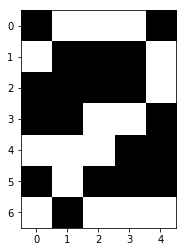

In [5]:
num_show(train[0])
ytr[0]

#### SLNN

There's a class ```SLNN``` available to us. With it, we can train a SLNN model, predict values with it, compute the accuracy...ç

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	BFGS
Regularization parameter:	0
Loss:				118.46417176691992
Training accuracy:		83.4%
Test accuracy:			69.02%
---------------------------------------------------------------------------
Gradient: 
 [ 3.34755951 -2.75027427  1.53369366 -0.0117573   4.23008194 -4.08477929
  4.76065388  1.38514174  1.48382942 -4.20415297 -4.46852192  1.35253901
  3.00523672  2.55073946 -3.98047919  4.06434025 -7.99155245 -5.11153683
 -2.60581008  5.0110771  -7.08286649  1.78326372  5.47111578  1.49330305
 -3.01948757 -5.54125161  2.90135054  2.10486234  1.38959657 -4.59800561
  2.90079164 -2.12464488 -1.48855845 -0.35475382  1.73415255]
---------------------------------------------------------------------------


,alpha,f(x),||g(x)||,r,M
0,NaN,125.000000,23.498640,NaN,NaN
1,1.254522e-02,121.438869,69.109355,2.940994,0.125156
2,1.019185e-09,118.630034,29.552085,0.427613,0.006187
3,4.751237e-16,118.464172,21.709071,0.734604,0.024858


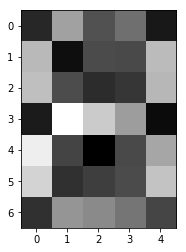

In [6]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.train("BFGS", train, ytr)
net.summary(test, yte)

There's another method of ```SLNN``` called ```cvtrain```, which will find a regularization parameter for us (using cross-validation) and train the model with it.

Single Layer Neural Network (SLNN)
---------------------------------------------------------------------------
Input size:			35
Output size:			1 (binary)
---------------------------------------------------------------------------
Train data:			500 observations
Chosen optimization routine:	BFGS
Regularization parameter:	0.3
Loss:				45.64988762129941
Training accuracy:		95.6%
Test accuracy:			90.32%
---------------------------------------------------------------------------
Gradient: 
 [-0.17948467  0.13771914 -0.12362389  0.03798269 -0.05127049  0.13201352
  0.29118305 -0.14038465 -0.15749186  0.26065896 -0.32562301 -0.07579167
 -0.29402269 -0.35554792  0.2716692   0.32671559 -0.0893419   0.4035869
  0.188556    1.04683121 -0.68215907  0.05954559 -0.88975188 -0.04702216
  0.3506315   0.20085228 -0.34674192 -0.20652523 -0.02045568  0.81186022
 -0.39467069  0.11929531  0.45355152  0.13682345 -0.17175046]
---------------------------------------------------------------------------


,alpha,f(x),||g(x)||,r,M
0,NaN,120.650476,21.797951,NaN,NaN
1,4.525402e-01,92.409202,126.689790,5.812005,0.266631
2,2.139093e-09,48.126839,45.508915,0.359215,0.002835
3,7.812548e-16,45.696399,7.200783,0.158228,0.003477
4,4.982071e-22,45.649975,2.231332,0.309874,0.043033
5,2.405773e-28,45.649888,2.182899,0.978294,0.438435


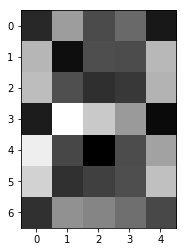

In [7]:
train, test, ytr, yte = gen_data(123456, 500, [8], 0.5, 0.1)
net = SLNN()
net.cvtrain("BFGS", train, ytr)
net.summary(test, yte)